In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

colors = [value['color'] for value in plt.rcParams['axes.prop_cycle']]
blue, green, red = colors[0], colors[2], colors[3]

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
img {margin: 0 auto;}
iframe {display: block; margin: 0 auto; padding-bottom: 1.5em;}
.center {text-align: center;}
twitter-widget {margin: 0 auto;}
</style>
""")

## Problem

Solution for the puzzle introduced in the Numberphile video named "Darts in Higher dimensions"

In [3]:
HTML("""
<iframe width="560" height="315" src="https://www.youtube.com/embed/6_yU9eJ0NxA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
""")

This problem is based on the following tweet

In [4]:
HTML("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">[1/2] In the game of HyperDarts, the bull’s eye starts out with a diameter of 1, but each dart that lands reduces it to the length of the chord the dart lies on (or 0, if the dart is outside the bull’s eye). <a href="https://t.co/Ojz77MJNxj">pic.twitter.com/Ojz77MJNxj</a></p>&mdash; Greg Egan (@gregeganSF) <a href="https://twitter.com/gregeganSF/status/1160461092973211648?ref_src=twsrc%5Etfw">August 11, 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

## Disclaimer

All of the results has been obtained before the answer was revealed in the video. Simple observations will match those mentioned in the video, but the core part is different and doesn't require building connection between problem and hyperspheres.

## Solution

In [18]:
def draw_square():
    square = patches.Rectangle((-1, -1), 2, 2, edgecolor=blue, facecolor=blue, alpha=0.5)
    square_outline = patches.Rectangle((-1, -1), 2, 2, edgecolor='black', fill=False, linewidth=2)
    
    ax = plt.gca()
    ax.add_artist(square)
    ax.add_artist(square_outline)
    
def draw_circle(radius, color=green):
    circle = plt.Circle((0, 0), radius, color=color)
    circle_outline = plt.Circle((0, 0), radius, color='black', fill=False, linewidth=2)
    
    ax = plt.gca()
    ax.add_artist(circle)
    ax.add_artist(circle_outline)
    
def prettify_plot():
    plt.scatter([0], [0], color='black', zorder=1000)
    
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    plt.xticks([-1, 0, 1], [-1, 0, 1])
    plt.yticks([-1, 0, 1], [-1, 0, 1])

### Observations

We always start a game with a score equal to 1, so we will never can get any score less then one, which means that expected score has to be greater than 1.

Next, it's easy to calculate probability of gaining another score. Considering that points are sampled randomly from the uniformal distribution it's easy to calculate probability of gaining second score. All we need to do is just divide area of a circle by the area of a square.

$$
P(\text{Gaining second score after the first throw}) = \frac{S_{circle}}{S_{square}} = \frac{\pi r^2}{l^2} = \frac{\pi}{4}
$$

Probability is larger than 50% which means that more than half of the times we should gain second score. It means that the expected value also should be greater than 2.

### Calculating radius of the new circle

It's easy to find radius of the new circle using Pythagorean theorem

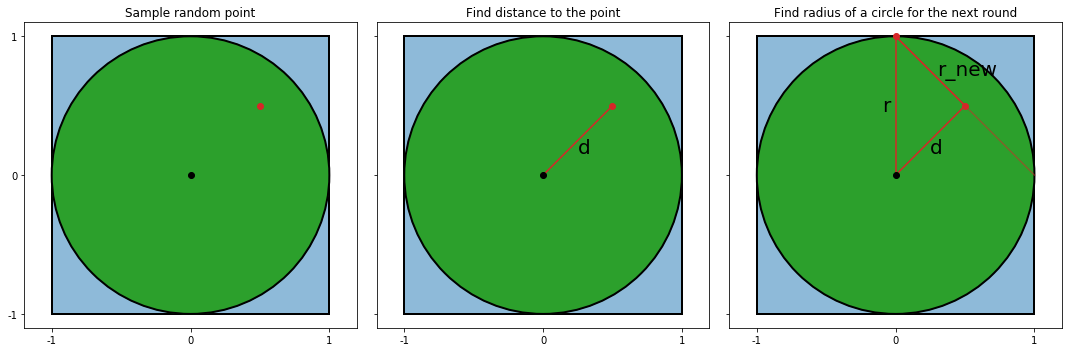

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

titles = [
    'Sample random point',
    'Find distance to the point',
    'Find radius of a circle for the next round',
]
plt.rc('text', usetex=False)
default_font = dict(size=20)
    
for i, ax in enumerate(axes):
    plt.sca(ax)
    plt.title(titles[i])
    
    draw_square()
    draw_circle(radius=1)
    plt.scatter([0.5], [0.5], zorder=1000, color=red)
    plt.axis('equal')
    
    if i >= 1:
        plt.plot([0, 0.5], [0, 0.5], zorder=100, color=red)
        plt.text(0.25, 0.2, "d", rotation=0, verticalalignment='center', fontdict=default_font)
        
    if i >= 2:
        plt.plot([0, 0], [0, 1], zorder=100, color=red)
        
        plt.plot([0.5, 0], [0.5, 1], zorder=100, color=red)
        plt.text(0.3, 0.75, "r_new", rotation=0, verticalalignment='center', fontdict=default_font)
        
        plt.plot([1, 0], [0, 1], zorder=100, color=red, alpha=0.5)
        plt.scatter([0], [1], zorder=1000, color=red)
        plt.text(-0.1, 0.5, "r", rotation=0, verticalalignment='center', fontdict=default_font)
    
    prettify_plot()
    
plt.tight_layout()
plt.show()

where,

\\(r\\) - radius of a circle

\\(d\\) - distance from center of a circle to a randomly samplde point within that circle

$$
d = \sqrt{x^2 + y^2}, \text{where } x, y \text{ ~ } U(-1, 1)
$$

\\(r_{new}\\) - radius of a new circle

$$
r_{new} = \sqrt{r^2 - d^2} = \sqrt{r^2 - x^2 - y^2}
$$

or 

$$
r_{new}^2 = r^2 - x^2 - y^2
$$

### Expected value

From the definition of the expected value we know that

$$
\mathbb{E}[s] = \sum_{i=1}^{\infty} i \cdot {P(s = i)}
$$

Since we know that \\(i\\) is a positive integer we can rewrite this sequnce in the following way

$$
\begin{align}
\mathbb{E}[s] &= \sum_{i=1}^{\infty} i \cdot {P(s = i)} = \\
              &= \sum_{i=1}^{\infty} \sum_{j=1}^{i} {P(s = i)} = \\
              &= \sum_{j=1}^{\infty} \sum_{i=j}^{\infty} {P(s = i)} = \\
              &= \sum_{j=1}^{\infty} P(s \geq j)
\end{align}
$$

We can unroll the sequence in order to look at a few first terms

$$
\begin{align}
\mathbb{E}[s] &= \sum_{i=1}^{\infty} P(s \geq i) \\
              &= P(s \geq 1) + P(s \geq 2) + P(s \geq 3) + P(s \geq 4) + ...
\end{align}
$$

From the previous observatios we know that \\(P(s \geq 1)=1\\) and \\(P(s \geq 2)=\frac{\pi}{4}\\). Value for the \\(P(s \geq 3)\\) is less straight forward, since new circle will depend on the random variable obtained from the previous round, but it can be calculated.

### Calculating \\(P(s \geq 3)\\)

#### Decomposing probability into simpler terms

The biggest difference between \\(P(s \geq 2)\\) and \\(P(s \geq 3)\\) is that first one is based on the circle with a constant radius where in the second one it's random and based on the outcome of the first round.

It's important to note that we can play second round only when the first one was successful, which means that 

$$
P(s \geq 3) = P(s \geq 2) P(W\text{ | }g=2)
$$

where, \\(P(W\\text{ | }g=2)\\) means probability of sampling random point within a circle in the second round (g=game, W=win)

In fact, it's true for any round

$$
P(s \geq i + 1) = P(s \geq i) P(W\text{ | }g=i)
$$

#### Distribution of circles for the next round

Since in the second round radius of a circle is random, we need to find distribution of radiuses, before we can derive probability of winning the second round.

We know the radius squared after successfull first round will be equal to

$$
r_{new}^2 = r^2 - x^2 - y^2
$$

From this formula, it's hard to see distrubution of squared radiuses for two reasons. First, random variables are squared and added together. Second, we cannot take into account all the numbers, since \\(r_{new}\\) cannot be calculated when the game was lost (for example, we lose when \\(x=1\\) and \\(y=1\\)), which means that original uniformal distrubution was modified (no it's conditioned on the fact that point is in the circle).

Problem could be simplified by moving \\(x\\) and \\(y\\) into the polar coordinate system

$$
x = \rho \cos(\phi)
\\
y = \rho \sin(\phi)
$$

where

$$
\begin{align}
&\rho = r \sqrt{u} \\
&u \text{ ~ } U(0, 1) \\
&\phi \text{ ~ } U(0, 2\pi)
\end{align}
$$

Since we are interested in the \\(r_{new}^2\\) distribution \\(\phi\\) can be ignored

$$
\begin{align}
r_{new}^2 &= r^2 - x^2 - y^2 = \\
          &= r^2 - r^2 u \cos^2(\phi) - r^2 u \sin^2(\phi) = \\
          &= r^2 (1 - u)
\end{align}
$$

since \\(u\\) is sampled from the uniformal distrubution, the \\(r_{new}^2\\) will be also sampled from the uniformal distribution (scaling and shifting doesn't have any effect on the frequency of the random variables and therefore shape of the distribution will remain unchanged). Because \\(S=\pi \cdot r^2\\), the distribution of circle areas is also uniformal.

The closer randomly sampled point to the circle center the larger will be the radius of a new circle.

$$
d_1 > d_2 \Rightarrow d_1^2 > d_2^2 \Rightarrow r^2 - d_1^2 < r^2 - d_2^2 \Rightarrow S_1 < S_2
$$

From this it follows that 

$$
\begin{align}
P(W\text{ | }g=2) &= E[x^2 + y^2 < r^2] = \\
                  &= \frac{\mathbb{E}[S_o]}{4} = \\
                  &= \frac{\pi \cdot \mathbb{E}[r_{new}^2]}{4} \\
                  &= \frac{\pi \cdot r^2 \cdot (1 - \mathbb{E}[u])}{4} \\
                  &= \frac{\pi \cdot r^2 \cdot (1 - 0.5)}{4} \\
                  &= \frac{\pi}{8}
\end{align}
$$

and

$$
\begin{align}
P(s \geq 3) &= P(s \geq 2) P(W\text{ | }g=2) \\
            &= \frac{\pi}{4} \cdot \frac{\pi}{8} \\
            &= \frac{\pi^2}{32}
\end{align}
$$

### Generalizing calculations for \\(P(s \geq i)\\)

The \\(P(s \geq 4)\\) probability corresponds to the third throw and, as before, we need to find probability of hitting a circle for the third time \\(P(W\text{ | }g=3)\\). Now problem got harder, since we need to estimate expected area of a circle after two successful throws. Calculations for the circle after one succsssful throw was easy, since the initial circle had a fixed radius. We want to know what is the average circle produced by every possible circle with center in the origin and radius less then or equal to the radius of the original circle.

Let's consider two extrem cases. There is only one way of getting circle that has the same radius as the original after two throws. It can happen only if we hit the origin two times in a row. The other extrem cases is that we get circle with radius 0 which can happen only when we hit edge of a circle. There are way more possibilities of getting circle with radius equal to zero, since each possible circle produced after the first throw could be used to generate a new circle with a radius equal to zero. There are definitely more cases for the second extrem compare to the first one which means that distribution of the areas is no longer uniformal.

Let's consider another case. What is the probability of getting a circle after the second throw with half the area of the original circle. We know that this number has to be greater than for area equal to \\(\pi \, r^2\\) and less than for the area equal to 0, since after the first throw we get circle with area \\(0.2 \, \pi \, r^2\\) than we cannot get a circle with the area \\(0.5 \, \pi \, r^2\\) after the second throw. The image below shows with a red color all of the points within a green circle that will not be able to produce new circle with radius greater than half of the original circle. Even if we will be able to hit the green area of the circle in the first throw our chances of getting a circle with the area \\(0.5 \, \pi \, r^2\\) will be lower when generated point is closer to the origin.

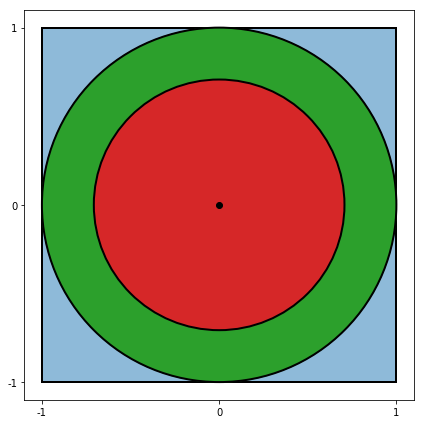

In [27]:
plt.figure(figsize=(6, 6))
draw_square()
draw_circle(radius=1)
draw_circle(radius=np.sqrt(0.5), color=red)
prettify_plot()
plt.tight_layout()

We can calculate probability of getting a circle with certain radius squared \\(x\\) after the n-th throw by sampling circle with random radius from some unknown distrubution \\(p_n\\) and sample a new circle uniformly but throwing dart inside that circle. We can aggregate every possible combination using integral. As we noted before, we cannot sample every possible circle from every possible circle, because its impossible to sample large circle from a smaller one. Because of that only subset of circles allow us to sample circles with area equal to \\(\pi \, x\\). To be exact, there are only \\((1 - x)\\) circles that have this property.

since each throw hits circle randomly from uniformal distrubution, sampling a new circle will always have the same probability distrubution.

$$
p_h(z) = \begin{cases}
1,& 0\leqslant z\leqslant{1}\\
0,&\text{otherwise.}
\end{cases}
$$

a new circle with area equal to \\(x\\) after the n-th throw will have a probability density function (PDF) equal to \\(p_n\\)

$$
\begin{align}
p_n(x) &= \frac{1}{P_n} \, q_n(x) \\
q_n(x) &= \int_x^1 p_{n-1}(z) \, p_h(z) \, dz \\
       &= \int_x^1 p_{n-1}(z) \, dz
\end{align}
$$

where 

$$
P_n = \int_0^1 q_{n}(x) dx
$$

We can provide by mathematical induction that the following is always true

$$
p_{n+1}(x) = (n+1) \, (1 - x) ^ n
$$

we know that \\(p_1(x) = 1\\) which proves previous statement for \\(n=0\\). Now, let's assume that main statement is true and show that the same will be true 

$$
\begin{align}
q_{n+2}(x) &= \int_x^1 p_{n+1}(z) \, dz \\
           &= \int_x^1 (n+1) \, (1 - z) ^ n \, dz \\
           &= \int_{1-x}^{0} -(n+1) \, t ^ n \, dt \\
           &= \left.-t^{n+1}\right|_{1-x}^{0} = (1-x)^{n+1}
\end{align}
$$

we know that

$$
p_{n+2}(x) = \frac{1}{P_{n+2}} \, q_{n+2}(x)
$$

It's easy to show that \\(P_{n+2}=\frac{1}{n+2}\\)

$$
\begin{align}
P_{n+2} &= \int_0^1 q_{n+2}(x) dx \\
        &= \int_0^1 (1-x)^{n+1} dx \\
        &= \int_1^0 -(1-x)^{n+1} d(1-x) \\
        &= \int_1^0 -t^{n+1} dt \\
        &= \left.\frac{-t^{n+2}}{n+2}\right|_1^0 \\
        &= \frac{1}{n+2}
\end{align}
$$

and finally, we can see that 

$$
p_{n+2}(x) = \frac{1}{P_{n+2}} \, q_{n+2}(x) = (n+2) \, (1-x)^{n+1}
$$

Which proves our intial statement

Finally, we see that

$$
\begin{align}
P(W\text{ | }g=i) &= \frac{\pi}{4} \, \int_0^1 p_{n-1}(x) \, x \, dx \\
                  &= \frac{\pi}{4} \, \int_0^1 (i-1) \, (1 - x)^{i - 2} \, x \, dx \\
                  &= \frac{\pi}{4} \, (i-1) \, \int_1^0 t^{i - 2} \, (t - 1) \, dt \\
                  &= \frac{\pi}{4} \, (i-1) \, (\left.\frac{t^i}{i}\right|_1^0 - \left.\frac{t^{i-1}}{i-1}\right|_1^0)\\
                  &= \frac{\pi}{4} \, (i-1) \, (\frac{1}{i-1} - \frac{1}{i})\\
                  &=\frac{\pi}{4i}
\end{align}
$$

### Final result


The final result will look like this

$$
\begin{align}
\mathbb{E}[s] &= P(s \geq 1) + P(s \geq 2) + P(s \geq 3) + P(s \geq 4) + ... \\
              &= 1 + \frac{\pi}{4} + (\frac{\pi}{4})^2 \, \frac{1}{2} + (\frac{\pi}{4})^3 \, \frac{1}{6} + ... \\
              &= \sum_0^{\infty} (\frac{\pi}{4})^i \, \frac{1}{i!}
\end{align}
$$

Expression above is just a taylor series expansion of the exponential function at the point \\(x=\frac{\pi}{4}\\)

$$
\mathbb{E}[s] = e^{\frac{\pi}{4}}
$$

## Validating results with a simple simulation

It's very easy to simulate this game 10 million times with a few lines of code. At the end, we can average all of the scores and compare obtained number with the answer. Because it's a simulation, we don't expect to see exactly the same number, but the average produced by a simulation should be very close to what we expect.

{% highlight sql %}
import math
import numpy as np

n_trials = 10000000
scores = []

for _ in range(n_trials):
    score = 1
    radius = 1
    
    while True:
        x, y = np.random.random(2) * 2 - 1
        distance = np.sqrt(x ** 2 + y ** 2)
        
        if distance > radius:
            # Game ends, we lost
            break
            
        score += 1
        radius = np.sqrt(radius ** 2 - distance ** 2)

    scores.append(score)

print("Expected score: {}".format(np.exp(np.pi / 4)))
print("Average score:  {}".format(np.mean(scores)))
{% endhighlight %}

In [17]:
import math
import numpy as np

n_trials = 10000000
scores = []

for _ in range(n_trials):
    score = 1
    radius = 1
    
    while True:
        x, y = np.random.random(2) * 2 - 1
        distance = np.sqrt(x ** 2 + y ** 2)
        
        if distance > radius:
            # Game ends, we lost
            break
            
        score += 1
        radius = np.sqrt(radius ** 2 - distance ** 2)

    scores.append(score)

print("Expected score: {}".format(np.exp(np.pi / 4)))
print("Average score:  {}".format(np.mean(scores)))

Expected score: 2.1932800507380152
Average score:  2.1933543


Result from the simulation is quite close to the exact answer that we derived which increases confidence in the answer